# Iris Dataset: Foundational Data Analysis 


**Introduction**

The Iris dataset was used in R.A. Fisher's classic 1936 paper,The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id

SepalLengthCm 

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

**Import modules and datasets**

In [64]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import itertools



from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from utils import extract_plot_ranges, generate_grid_points

%config InlineBackend.figure_format = "retina"

# set seaborn aesthetics
sns.set_context("notebook")
sns.set_style("white")

# set colormap
CMAP = "tab10"

# set random seed
seed = 10
np.random.seed(seed)


ModuleNotFoundError: No module named 'utils'

In [2]:
#import data set
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df = pd.DataFrame(iris)
print(" Shape of the dataframe: ",iris_df.shape,";\n","Describe dataframe: \n",iris_df.info)

 Shape of the dataframe:  (150, 5) ;
 Describe dataframe: 
 <bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


**Data cleaning**

check for null values and duplicates in the dataset

In [4]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris_df.duplicated().sum()

np.int64(1)

In [6]:
iris_df[iris_df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [7]:
iris_df = iris_df.drop_duplicates()

In [8]:
iris_df.duplicated().sum()

np.int64(0)

In [9]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**EDA**

explore the dataset, find patterns and correlations in the dataset

single factor analysis

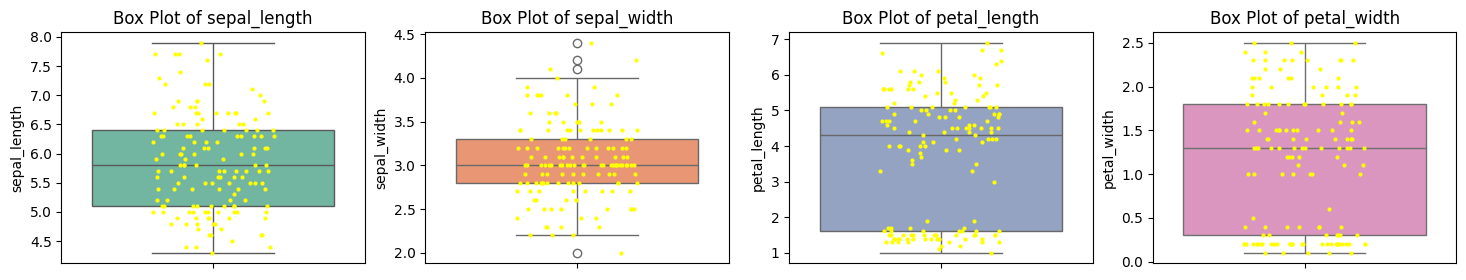

In [10]:
#single factor analysis
numeric_features = iris_df.select_dtypes(include=['float64', 'int64']).columns
fig = plt.figure(figsize=(18,3))
colors = sns.color_palette("Set2", len(numeric_features))

for idx, feature in enumerate(numeric_features, start=1):
    ax = fig.add_subplot(1, 4, idx)  # 2 rows, 3 cols, current index
    sns.boxplot(y=iris_df[feature], ax=ax,color=colors[idx - 1])
    sns.stripplot( y=iris_df[feature], color="yellow", jitter=0.2, size=3)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_ylabel(feature)

we can see that in the boxplot of spetal_width there are several outliners 

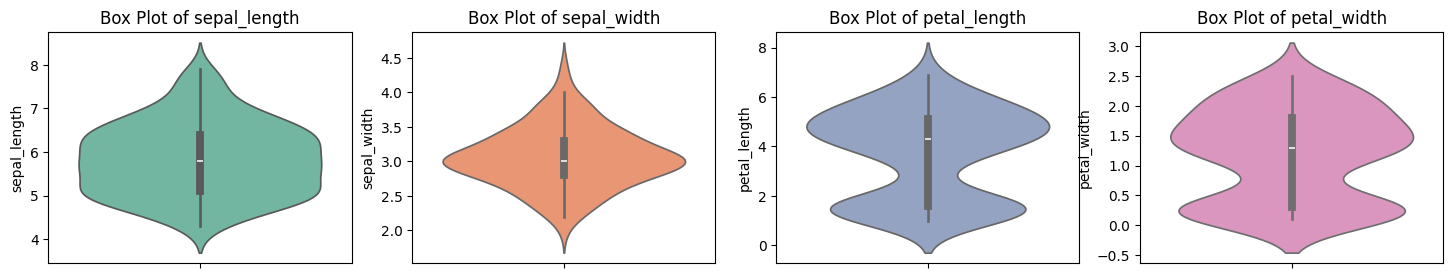

In [11]:
#single factor analysis
numeric_features = iris_df.select_dtypes(include=['float64', 'int64']).columns
fig = plt.figure(figsize=(18,3))
colors = sns.color_palette("Set2", len(numeric_features))

for idx, feature in enumerate(numeric_features, start=1):
    ax = fig.add_subplot(1, 4, idx)  # 2 rows, 3 cols, current index
    sns.violinplot(y=iris_df[feature], ax=ax,color=colors[idx - 1])
    ax.set_title(f'Box Plot of {feature}')
    ax.set_ylabel(feature)

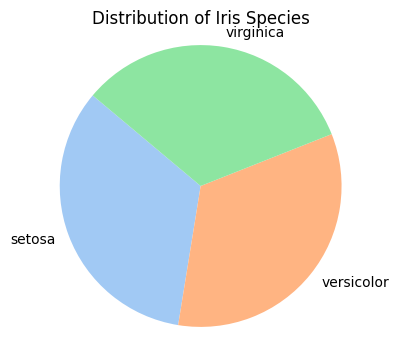

In [12]:
#display the distribution of the speices

species_counts = iris_df['species'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(
    species_counts,
    labels=species_counts.index,
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Distribution of Iris Species')
plt.axis('equal')  
plt.show()

multi factor

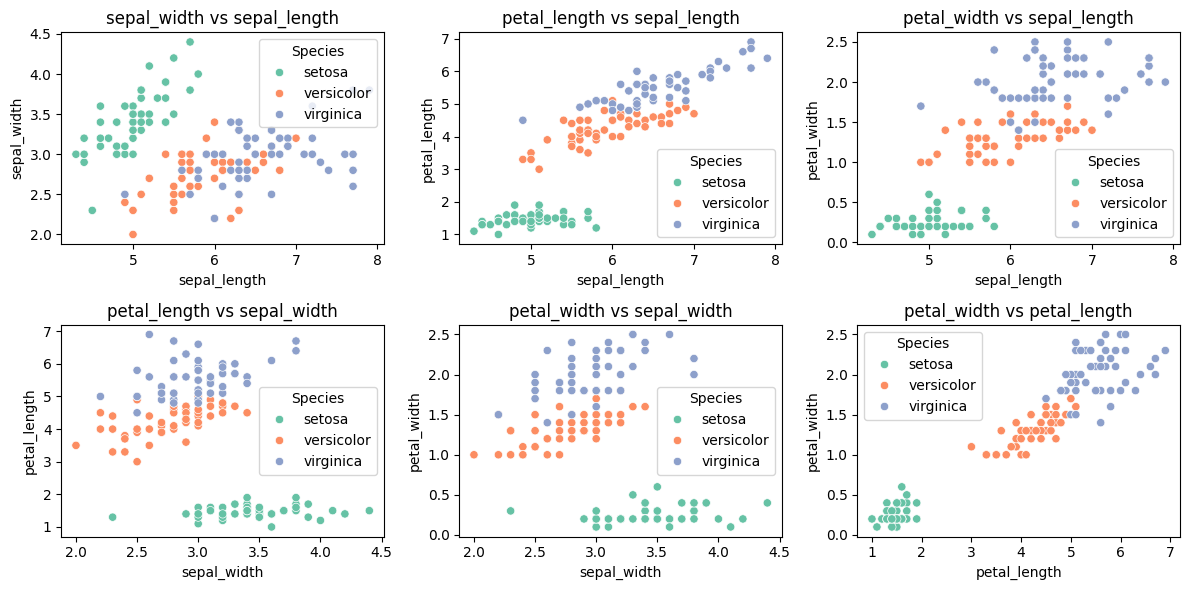

In [13]:
#correlation visualzation
iris_df = iris_df.drop_duplicates()

# Feature pairs to plot
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pairs = list(itertools.combinations(features, 2))  # all unique 2-feature combinations

# Set up 3x2 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

# Create each subplot
for i, (x_feat, y_feat) in enumerate(pairs):
    sns.scatterplot(data=iris, x=x_feat, y=y_feat, hue='species', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{y_feat} vs {x_feat}')
    axes[i].legend().set_title('Species')

# Remove unused subplot if any
if len(axes) > len(pairs):
    for j in range(len(pairs), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


# Modeling

to choose the correct model used for a classification problem for iris dataset, considering iris is a small sized, three class dataset, there's the model to choose from: 

Logic regression 

KNN 

decision tree

random forest

SVM

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



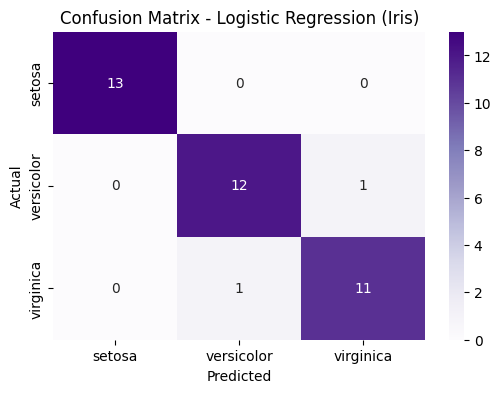

In [62]:
#logic regression

iris = iris_df.copy()
 
y = iris.pop('species')
X = iris  

#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
#model
model = LogisticRegression(
    # multi_class="multinomial", #use multinomial because target has 3 classes
    solver="lbfgs",             
    max_iter=200               
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#result

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=y.unique()))
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=y.unique(),
            yticklabels=y.unique())

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Iris)")
plt.show()

k=1, accuracy=0.947
k=2, accuracy=0.921
k=3, accuracy=0.974
k=4, accuracy=0.974
k=5, accuracy=0.974
k=6, accuracy=0.947
k=7, accuracy=0.947
k=8, accuracy=0.947
k=9, accuracy=0.974
k=10, accuracy=0.974

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



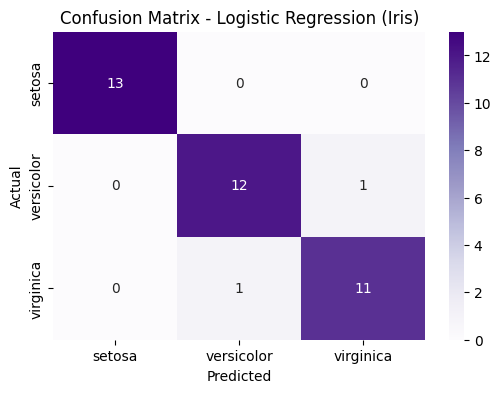

In [53]:
#KNN
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"k={k}, accuracy={score:.3f}")
# model (with k=4)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)


#Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=y.unique()))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=y.unique(),
            yticklabels=y.unique())

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Iris)")
plt.show()

In [63]:

# Select only 2 features for 2D plotting
X_2d = X.iloc[:, 2:4].values

knn2d = KNeighborsClassifier(n_neighbors=4)
knn2d.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Set1, marker="o", label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Set1, marker="s", label="Test")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("KNN Decision Boundary (k=4)")
plt.legend()
plt.show()


C:\Users\15256\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.